In [4]:
!pip install pykalman

In [3]:
%matplotlib inline
#Import a Kalman filter and other useful libraries
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy import polyld
from scipy.integrate import odeint

In [10]:
tau = 0.1

#Set up filter
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, #position is 1-dimensional
                  initial_state_mean = [30,10],
                  initial_state_covariance= np.eye(2),
                  transition_matrices=[[1,tau],[0,1]],
                  observation_matrices=[[1,0]],
                  observation_covariance=3,
                  transition_covariance=np.zeros((2,2)),
                  transition_offsets=[-4.9*tau**2, -9.8*tau])


In [15]:
#Create a simulation of a ball fallin out for 40 units of time
times = np.arange(40)
actual = -4.9*tau**2*times**2

#Simulate the noisy camera data
sim = actual + 3*np.random.randn(40)

#Run filter on camera data
state_means, state_covs = kf.filter(sim)

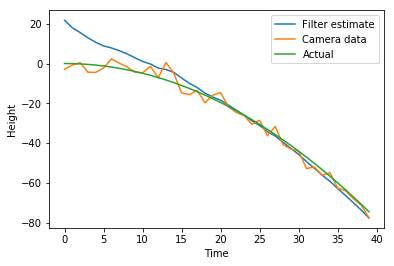

In [16]:
plt.plot(times, state_means[:,0])
plt.plot(times, sim)
plt.plot(times, actual)
plt.legend(['Filter estimate', 'Camera data', 'Actual'])
plt.xlabel('Time')
plt.ylabel('Height');

## 5 Moving Average

In [18]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2013, 1, 1)
end = datetime.datetime(2015, 1, 27)

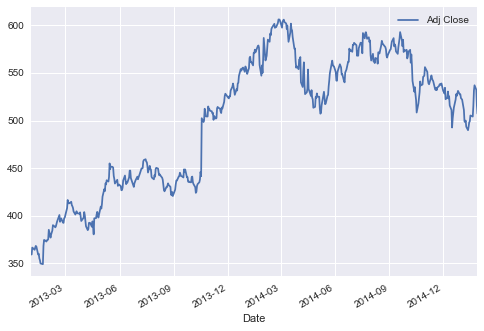

In [42]:
f = web.DataReader('GOOG', 'yahoo', start, end) #Aquí puedes cambiar ACCIONES (GOOGLE)
f.plot(f.index, 'Adj Close') #etiqueta de los datos de yahoo finance

In [43]:
x = f['Adj Close']

In [55]:
#import seaborn as snb
%matplotlib notebook

<IPython.core.display.Javascript object>


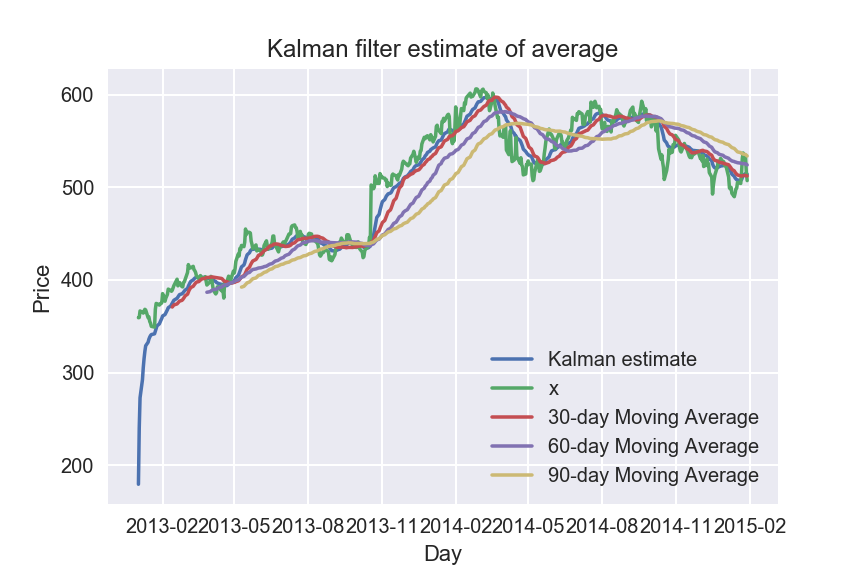

In [56]:
#Set up filter
kf = KalmanFilter(
                  transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean = 0, 
                  initial_state_covariance = 1,   
                  observation_covariance=1,
                  transition_covariance=.01)

# Use the observed values of the price to get a rolling mean
state_means, _ = kf.filter(x.values)
state_means = pd.Series(state_means.flatten(), index = f.index)

#Compute the rolling mean with various lookback windows
mean30 = x.rolling(window = 30).mean()
mean60 = x.rolling(window = 60).mean()
mean90 = x.rolling(window = 90).mean()

#plot original data and estimated mean
plt.plot(state_means)
plt.plot(x)
plt.plot(mean30)
plt.plot(mean60)
plt.plot(mean90)
plt.title('Kalman filter estimate of average')
plt.legend(['Kalman estimate', 'x', '30-day Moving Average', '60-day Moving Average', '90-day Moving Average'])
plt.xlabel('Day')
plt.ylabel('Price')
